In [1]:
import numpy as np
import scipy.io as spio
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
input_layer_size = 400
num_labels = 10

In [3]:
mat = spio.loadmat("/Users/devin/ML/machine-learning-ex3/ex3/ex3data1.mat")

### Logistic regression

In [4]:
X = mat['X']
y = mat['y']
y[y==10] = 0
y = y.flatten()
m = X.shape[0]

In [5]:
rand_indices = np.random.permutation(m)
sel = X[rand_indices[:100]]

In [6]:
def display_data(X,example_width=None):
    if example_width is None:
        example_width = int(round(np.sqrt(X.shape[1])))
    m, n = X.shape
    example_height = int(n/example_width)    
    display_rows = math.floor(np.sqrt(m));
    display_cols = math.ceil(m / display_rows)
    pad = 1
    display_array = - np.ones((pad + display_rows * (example_height + pad),pad + display_cols * (example_width + pad)))
    curr_ex = 0
    for j in range(0,display_rows):
        for i in range(0,display_cols):
            if curr_ex >= m:
                break
            max_val = max(abs(X[curr_ex, :]))
            rows = pad + (j) * (example_height + pad)
            cols = pad + (i) * (example_width + pad)
            display_array[rows:example_height+rows,cols:example_width+cols] = np.reshape(
                X[curr_ex, :], (example_height, example_width)).T / max_val
            curr_ex = curr_ex + 1 
        if curr_ex >= m:
            break
    plt.figure(figsize=(10,10))        
    ax = plt.subplot(111)
    ax.imshow(display_array,cmap='Greys')
    plt.axis('off')

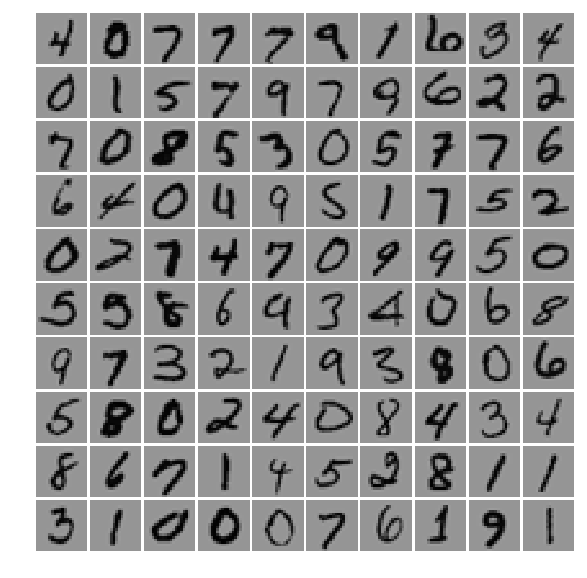

In [7]:
display_data(sel)

In [8]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [9]:
def lrCostFunction(theta, X, y, lamda):
    m = len(y)
    h = sigmoid(np.dot(X,theta.T))
    J = (-1/m) * sum((y * np.log(h) + (1-y) * np.log(1 - h))) + (lamda / (2*m)) * sum(theta[1:] ** 2) 

    temp = np.zeros(theta.shape)
    temp[1:] = theta[1:]
    h = sigmoid(np.dot(X, theta.T))
    grad = (1/m) * np.dot(np.subtract(h,y).T,X) + ((lamda / m) * temp)
    return J, grad

In [11]:
theta_t = np.array([-2, -1, 1, 2])
X_t = np.hstack((np.ones((5,1)), np.array([x for x in range(1,16)]).reshape((3,5)).T/10))
y_t = np.array([1, 0, 1, 0, 1])
lambda_t = 3
J, grad = lrCostFunction(theta_t, X_t, y_t, lambda_t)

print('\nCost: %f\n' % J)
print('Expected cost: 2.534819\n')
print('Gradients:\n')
print(' %r \n' % grad)
print('Expected gradients:\n')
print(' 0.146561\n -0.548558\n 0.724722\n 1.398003\n')


Cost: 2.534819

Expected cost: 2.534819

Gradients:

 array([ 0.14656137, -0.54855841,  0.72472227,  1.39800296]) 

Expected gradients:

 0.146561
 -0.548558
 0.724722
 1.398003



In [16]:
import scipy.optimize as opt

def one_vs_all(X, y, num_labels, lamda):
    m,n = X.shape
    all_theta = np.zeros((num_labels,n+1))
    X = np.hstack((np.ones((m,1)),X))
    initial_theta = np.zeros(n+1)
    options = {'maxiter':50,'disp':True}
    for c in range(num_labels):
        all_theta[c,:] = opt.minimize(lrCostFunction, initial_theta, 
                                     args = (X,y==c,lamda), method='BFGS',
                                      jac=True,options=options).x
    return all_theta

In [17]:
lamda = 0.1
all_theta = one_vs_all(X, y, num_labels, lamda)

         Current function value: 0.016445
         Iterations: 50
         Function evaluations: 51
         Gradient evaluations: 51
         Current function value: 0.023312
         Iterations: 50
         Function evaluations: 51
         Gradient evaluations: 51
         Current function value: 0.068360
         Iterations: 50
         Function evaluations: 51
         Gradient evaluations: 51
         Current function value: 0.071812
         Iterations: 50
         Function evaluations: 51
         Gradient evaluations: 51
         Current function value: 0.050061
         Iterations: 50
         Function evaluations: 51
         Gradient evaluations: 51
         Current function value: 0.075951
         Iterations: 50
         Function evaluations: 51
         Gradient evaluations: 51
         Current function value: 0.032799
         Iterations: 50
         Function evaluations: 51
         Gradient evaluations: 51
         Current function value: 0.045323
         Iterations:

In [22]:
print(all_theta.shape)

(10, 401)


In [18]:
def predict_one_vs_all(all_theta, X):
    m = X.shape[0]
    num_labels = all_theta.shape[0]
    p = np.zeros((m, 1))
    X = np.concatenate((np.ones((m,1)), X),axis=1)
    p = np.argmax(sigmoid(X.dot(all_theta.T)),1)
    return p
    
    

In [19]:
predictions = predict_one_vs_all(all_theta, X)

In [20]:
sum(predictions == y) / len(y)

0.93240000000000001

### Neural Network

In [16]:
input_layer_size  = 400
hidden_layer_size = 25
num_labels = 10

In [17]:
mat = spio.loadmat("/Users/devin/ML/machine-learning-ex3/ex3/ex3data1.mat")
X = mat['X']
y = mat['y']
y = y.flatten()
m = X.shape[0]

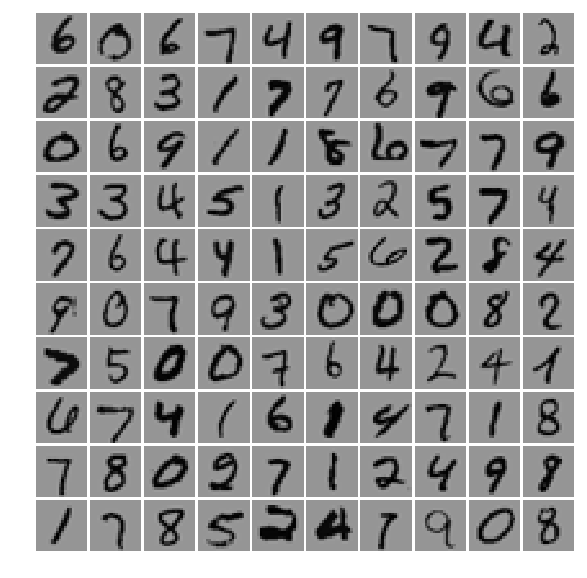

In [18]:
rand_indices = np.random.permutation(m)
sel = X[rand_indices[:100]]
display_data(sel)

In [19]:
thetas = spio.loadmat('/Users/devin/ML/machine-learning-ex3/ex3/ex3weights.mat')
Theta1 = thetas['Theta1']
Theta2 = thetas['Theta2']

In [20]:
def predict(Theta1, Theta2, X):
    m = X.shape[0]
    num_labels = Theta2.shape[0]
    p = np.zeros(m)
    
    a1 = np.concatenate((np.ones((m,1)),X),axis=1)
    z2 = a1.dot(Theta1.T)
    a2 = sigmoid(z2)
    a2 = np.concatenate((np.ones((m,1)), a2),axis=1)
    z3 = a2.dot(Theta2.T)
    a3 = sigmoid(z3);
    p = np.argmax(a3, 1) + 1
    return p

In [21]:
nn_predictions = predict(Theta1, Theta2, X)

In [22]:
sum(nn_predictions == y) / len(y)

0.97519999999999996


Displaying Example Image


Neural Network Prediction: [7] (digit [7])



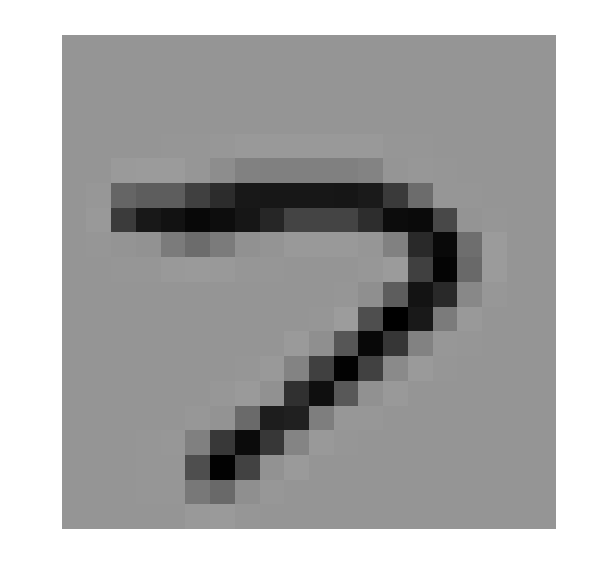

In [23]:
rp = np.random.permutation(m)

print('\nDisplaying Example Image\n')
display_data(X[rp[0], :].reshape((1,400)))
pred = predict(Theta1, Theta2, X[rp[0],:].reshape((1,400)))
print('\nNeural Network Prediction: {} (digit {})\n'.format(pred, pred % 10))
    